# Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"C:\Users\SURAJ\Downloads\Salary Data.csv")
df["Years of Experience"]=np.int64(df["Years of Experience"])
df = df.dropna()

In [3]:
df["Salary"] = np.int64(df.Salary)
df.shape

(985, 6)

<AxesSubplot: xlabel='Years of Experience', ylabel='Salary'>

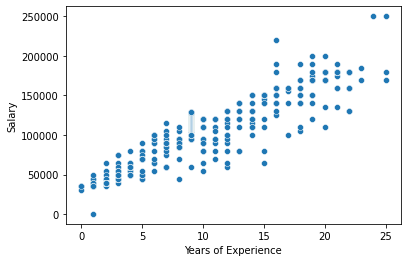

In [4]:
sns.scatterplot(df["Years of Experience"],df.Salary)

<AxesSubplot: >

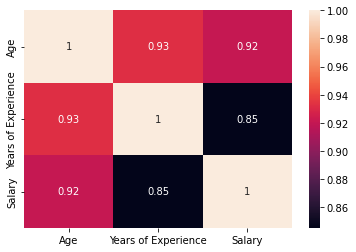

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
df["Education Level"].value_counts()

Bachelor's    582
Master's      272
PhD           131
Name: Education Level, dtype: int64

In [7]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [["PhD",2],["Master's",1],["Bachelor's ",0]]
enc.fit(X)
df["Education Level"]=np.int64(enc.fit_transform(df[["Education Level"]]))
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
15,32.0,Male,0,Software Engineer,5,90000
16,28.0,Female,1,Data Analyst,3,65000
17,45.0,Male,2,Senior Manager,15,150000
18,36.0,Female,0,Sales Associate,7,60000
19,52.0,Male,1,Director,20,200000


In [8]:
X = df["Years of Experience"]
Y = df["Salary"]

In [26]:
from sklearn.model_selection import train_test_split as tts 
X_train,X_test,y_train,y_test = tts(X,Y,train_size=0.8,random_state=1)


329     6
62     16
954     9
947     9
34     22
       ..
782     9
87     16
923     9
250     9
52     14
Name: Years of Experience, Length: 788, dtype: int64

In [10]:
X_train.describe()

count    788.000000
mean       9.348985
std        4.128961
min        0.000000
25%        9.000000
50%        9.000000
75%        9.000000
max       25.000000
Name: Years of Experience, dtype: float64

In [11]:
X.describe()

count    985.000000
mean       9.383756
std        4.075873
min        0.000000
25%        9.000000
50%        9.000000
75%        9.000000
max       25.000000
Name: Years of Experience, dtype: float64

In [28]:
from sklearn.preprocessing import PolynomialFeatures
ploy = PolynomialFeatures(degree=2)
X_train_2=ploy.fit_transform(X_train)
X_test_2=ploy.fit_transform(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 6 16  9  9 22  9 20  9  9 12  9  9 19  3 10  9 23  9  9  9  9  9  9  9
  9  9 20  9 20  9  9  9 15  6  9 10  9  9  9  9  9  9 10  9  9 12  9  4
  9  9  9  9  7  1  0  9  9  9  9 25  9 22  7  9  9  9 16  9  3  9  9  9
 18  9  9 21  9  9  9  9  9 14 12  9 15  9 15  9  9  9  6 13  9 16  9  9
  3  9  9  9  9  9  9  9  9  9  1  9  9 14 17  9  9  9  9  7  5 21  9  9
 11  9 19  5  9 19  9  9 12  9  9 12  9  9 21 22 21  9  9  9  9  9  9 11
  9 18  3  9 18  0  9 22  9  9 12  9  9  4 21  3  2  9  5  6  7  9  8  9
 16 14  9  9  3  9  9  9 10  9  9  9  9  9  2  9  0  9  9  9 21 18  9 16
  9  5  9  9  7  2  9  9  9  9  9 18  6  8  9  9  4  3 15  9  9  9  9  9
  9  1  9  9  5  3  4  9  9  9  8  9  9  9  9 15  9  9  9 12  9  9  9  9
  9 19 12 17  9  9 14  9  9  3  9  9  9  9  9  9  1  9  9  6  3  9 21  7
  9 16  7  9  9  9  9  9 12  9  7  9  9  9  9  1  4  8  9  9 12 15  9 10
  9 10  9  9 25  9  2  1 10  2  5  4  9  9  2  5  9  9  9  9  9  9  3  9
  5  9  9  1  9  9  3  5 16 20  9  9  9  9  9  9  9  9  9  3  9  9 18 19
  2  9  9  9  8  3  9  9  9  9  9  9  9  9  9  9  9  9  2  9  9  9  9  9
  9  1  4  9  9  7  4  9  9  9  9  9  5  9  9  9  8  9 10  9  9  9  9  1
 15  9  9  9 18  0  4 14  9  9  9  3  9  9 25 14  5  9  9  6 23  9 22  7
 16  8 14  9  9 21  9  2  9  9  9  9 13  9  9  9 24  9 16  6  9  9  9  9
  9  9 18  9  3  9  9  9  1  9  9  2  9  9  9  9  9  9  9  9  8  9  9  9
  9  9  3  9  9  9  9  9 20  9  9  9  9  2  9  3  9  7  9  8  9  9 11  7
  7  9  5  9 16  9  2  9  9  9  1 15  9 10  9  9  9  9  9  7 18  8 10  9
  1 15  9  9  9  9  9  3  9  9  9  9  3  9  5  2  9  9 19  9  9  9  9 15
  9  9  9 20 13  6 13  2  9  9  9  9  9  9  3  9  2 19 16 13 15  4  9  9
  9  9  9 11  9  9  9  9  9  9 21  9  9  9  2  9  9  3  9  9  9  9  9  8
  9  9 19  9  2 19  9  9  3 21  9  4  9  9  9  9  9  8  9  9  9  9  9  1
  9  9  9 10  8  9  9  9  9  9  9  3  9  5 20  9  9  9  4 21  9  9  9  9
  9  4  9  9  9 21  8  9  9  9  9 13  2  9  9  9  9 18  9  3  4 22 15  9
  9  9  9  9  9  9  9  9  8 10  9  6  1  9 19  9  9  9  9  9  9  9  8  9
  9 19 20  9 11  9  5 19  9 16  6  9 15  9  9  9  9  9 10  9 14  9  9 14
  8  9 11  9  9  9  2  9  9  9  9  9  4  3 17  1 16  9  9  9  9 15  9 11
  9  8  9  9  9  9  9  9  9  9 11  9  9  9  9  9  9  9  8  9  2  9  9 13
  9  9  4  4  9 13  2  9  9  9  9  9  9  9  9  9  9  9  2  9  9  9 19 14
  8 20  1  9  9  9  9  9  8  1  9  9  9  9  9  9 16  9  9 14].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model_2 = lm.fit([y_train],X_train_2)

In [24]:
model_2.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
model_2.intercept_

array([  1.,   6.,  16., ...,  81., 126., 196.])